In [147]:
import pandas as pd
import plotly.express as px
import hvplot.pandas
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np


In [148]:
# Loading data
file_path = "Resources/cleaned_wake_w_date_df.csv"
df_wake = pd.read_csv(file_path)
df_wake.head(20)

,REAL_ESTATE_ID,Township,Deeded_Acreage,Total_sale_Price,Total_Sale_Date,Year_Built,HEATED_AREA,DESIGN_STYLE,BATH,Story_Height,PHYSICAL_CITY,PHYSICAL_ZIP_CODE,year,month,Quarter
0,19,1,0.21,34500,1974-01-01,1964,1828,I,C,A,RALEIGH,27610.0,1974,1,1
1,20,16,0.46,35500,1983-05-18,1970,1240,A,A,A,RALEIGH,27610.0,1983,5,2
2,22,10,0.46,37500,2004-09-16,1900,2261,A,C,A,WENDELL,27591.0,2004,9,3
3,25,8,0.96,70000,1971-01-01,1971,3770,A,J,A,RALEIGH,27613.0,1971,1,1
4,30,1,0.47,380000,2015-08-12,1946,1789,A,C,A,RALEIGH,27607.0,2015,8,3
5,31,13,0.39,337500,2002-07-17,1970,2463,A,C,A,RALEIGH,27615.0,2002,7,3
6,33,4,0.50,32500,1979-02-06,1969,2389,G,E,A,RALEIGH,27607.0,1979,2,1
7,34,1,0.70,19500,1968-01-01,1968,1280,A,C,A,RALEIGH,27606.0,1968,1,1
8,35,1,0.49,319000,1996-01-16,1938,4650,A,F,B,RALEIGH,27608.0,1996,1,1
9,37,1,0.13,425000,2008-04-15,1921,1890,A,C,C,RALEIGH,27604.0,2008,4,2


In [149]:
# Initializing model with K = 3
model = KMeans(n_clusters=3, n_init=10)
model

KMeans(n_clusters=3, n_init=10)

In [150]:
# Fitting model (with numeric values)
model.fit(df_wake[['HEATED_AREA', 'Total_sale_Price']])


KMeans(n_clusters=3, n_init=10)

In [151]:
predictions = model.predict(df_wake[['HEATED_AREA', 'Total_sale_Price']])
print(predictions)


[0 0 0 ... 0 2 2]


In [152]:
# Calculate range and average of Total Sale Price
total_sales_price_range = df_wake['Total_sale_Price'].max() - df_wake['Total_sale_Price'].min()
average_sales_price = df_wake['Total_sale_Price'].mean()

print("Range of Total Sale Price:", total_sales_price_range)
print("Average Total Sale Price:", average_sales_price)

Range of Total Sale Price: 7940000
Average Total Sale Price: 304220.0003803175


In [153]:
# Select the relevant features for clustering
data = df_wake[["Total_sale_Price", "PHYSICAL_CITY", "PHYSICAL_ZIP_CODE"]]

In [154]:
# Perform one-hot encoding to convert categorical variables into numerical representations
data_encoded = pd.get_dummies(data)


In [155]:
# Apply K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init=10)
kmeans.fit(data_encoded)

KMeans(n_clusters=3, n_init=10)

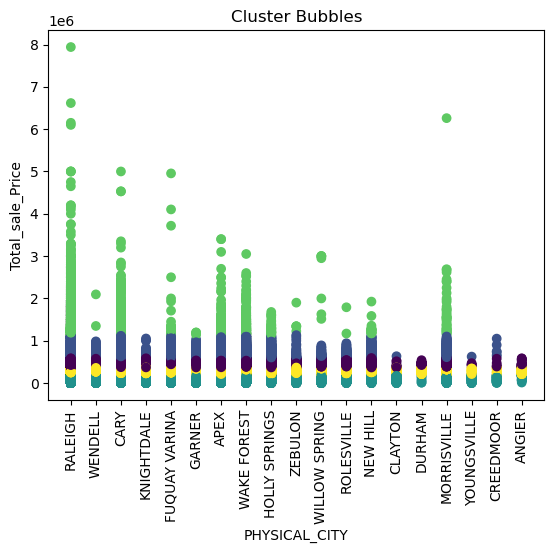

In [174]:
# Get the cluster labels
clusters = kmeans.labels_

# Create the scatter plot
plt.scatter(df_wake['PHYSICAL_CITY'], df_wake['Total_sale_Price'], c=clusters, cmap='viridis')
plt.xlabel('PHYSICAL_CITY')
plt.ylabel('Total_sale_Price')
plt.title('Cluster Bubbles')
plt.xticks(rotation=90)
plt.show()

#### highest number of homes sales  by year, month and quarter using k-means

In [157]:
# Create the feature 
X = df_wake[['year', 'month', 'Quarter', 'Total_sale_Price']]

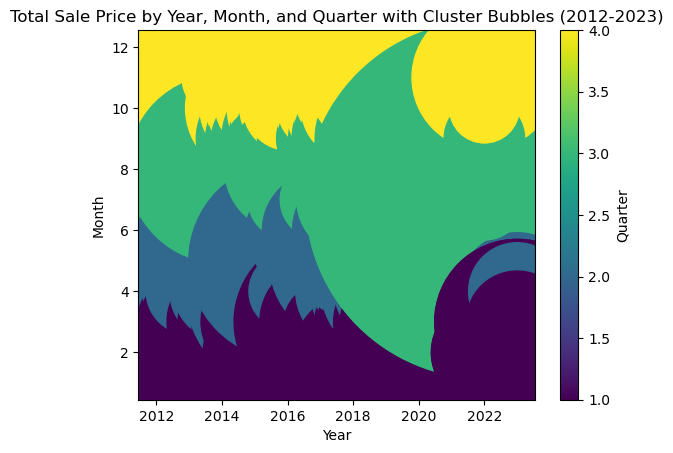

In [158]:
# Filter the data for years 2012 to 2023
filtered_data = df_wake[(df_wake['year'] >= 2012) & (df_wake['year'] <= 2023)]

# Retrieve the cluster labels for the filtered data
clusters = kmeans.labels_[filtered_data.index]

# Count the number of sales in each cluster for the filtered data
cluster_counts = np.bincount(clusters)

# Set the scaling factor for bubble size
scaling_factor = 100

# Create the scatter plot
plt.scatter(filtered_data['year'], filtered_data['month'], c=filtered_data['Quarter'], cmap='viridis', s=filtered_data['Total_sale_Price'] / scaling_factor)

plt.xlabel('Year')
plt.ylabel('Month')
plt.title('Total Sale Price by Year, Month, and Quarter with Cluster Bubbles (2012-2023)')

plt.colorbar(label='Quarter')
plt.show()



this shows the trend of increasing total sale prices and the number of houses being sold each month from 2012 to 2023. The larger bubble sizes indicate higher total sale prices, suggesting that more expensive houses are being sold.

###### Find relationshipt between deeded acreage, total sales price  by the year (try for square footage)

In [159]:
# Filter the data for desired columns
data = df_wake[["HEATED_AREA", "Total_sale_Price", "year"]]

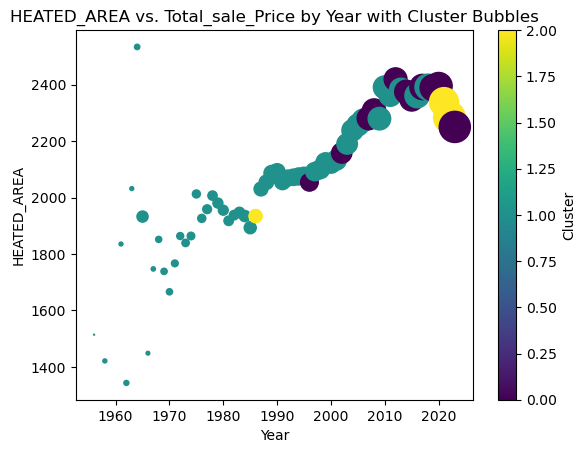

In [160]:

# Retrieve the cluster labels
clusters = kmeans.labels_

# Group the data by year and calculate average values
grouped_data = data.groupby("year").mean()

# Create an array to store the cluster labels for each year
cluster_labels = [clusters[df_wake[df_wake["year"] == year].index[0]] for year in grouped_data.index]

# Set bubble sizes proportional to the average Total_sale_Price
bubble_sizes = grouped_data["Total_sale_Price"] / 1000

# Create the scatter plot with bubble sizes and colors representing clusters
plt.scatter(grouped_data.index, grouped_data["HEATED_AREA"], s=bubble_sizes, c=cluster_labels, cmap="viridis")
plt.xlabel("Year")
plt.ylabel("HEATED_AREA")
plt.title("HEATED_AREA vs. Total_sale_Price by Year with Cluster Bubbles")
plt.colorbar(label="Cluster")
plt.show()



by looking at this scatter plot, it looks like there's relationship between deeded acreage with total sales prices for each year. 
higher deeded acreage is associated with higher total sale prices by looking at the data.

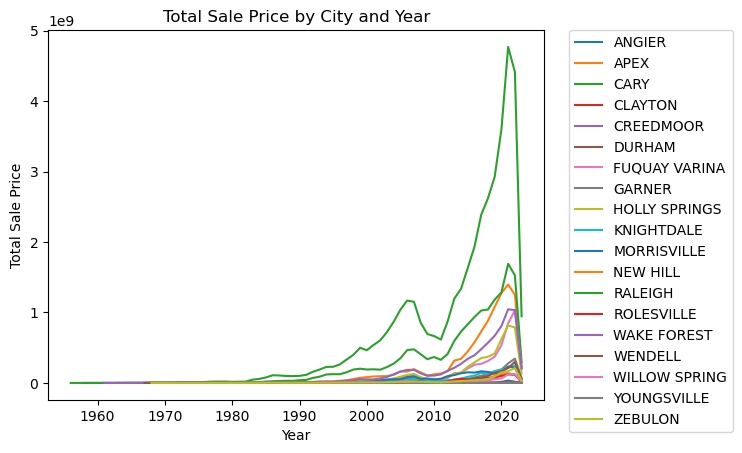

In [166]:

# Select the relevant columns for clustering
data = df_wake[['PHYSICAL_CITY', 'year', 'Total_sale_Price']]

# Perform k-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(data[['year', 'Total_sale_Price']])

# Assign cluster labels to the data
data_with_cluster = data.copy()
data_with_cluster['Cluster'] = kmeans.labels_

# Group the data by city and year and calculate the sum of total sale price
grouped_data = data_with_cluster.groupby(['PHYSICAL_CITY', 'year'])['Total_sale_Price'].sum().reset_index()

# Iterate over each city
cities = grouped_data['PHYSICAL_CITY'].unique()
for city in cities:
    city_data = grouped_data[grouped_data['PHYSICAL_CITY'] == city]
    plt.plot(city_data['year'], city_data['Total_sale_Price'], label=city)

# Set the x-axis label
plt.xlabel('Year')

# Set the y-axis label
plt.ylabel('Total Sale Price')

# Set the title of the plot
plt.title('Total Sale Price by City and Year')

# Add a legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)


# Show the plot
plt.show()


The code iterates over each city, retrieves the data for that city, and plots the total sale price against the year. Each city is represented by a different colored line. The legend shows the mapping between the city names and the corresponding line colors.
This plot helps visualize the trend of total sale price over time for different cities. 

The graph shows that the total sale price of real estate properties has generally increased over the years for each city. This suggests that the real estate market has experienced growth and rising property values over the last decade. The upward trend in total sale prices indicates a positive trend in the housing market, where properties are being sold at higher prices compared to previous years. It implies that the demand for real estate has increased, leading to higher sale prices in each city.